# Q 1

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import numpy as np
import scipy.sparse.linalg as spla

In [2]:
nodes_df = pd.read_csv('./politician_nodes.csv')
edges_df = pd.read_csv('./politician_edges.csv')

print("Nodes DataFrame:")
print(nodes_df.head())
print("\nEdges DataFrame:")
print(edges_df.head())

Nodes DataFrame:
   id       facebook_id                          page_name   page_type
0   4  1408935539376139  Mark Bailey MP - Labor for Miller  politician
1   5   134464673284112                Victor Dominello MP  politician
2   6   282657255260177               Jean-Claude Poissant  politician
3   7   239338246176789             Deputado Ademir Camilo  politician
4  11   837707072929819                      Eliziane Gama  politician

Edges DataFrame:
   id_1   id_2
0     4  13645
1     4  20876
2     4  11446
3     4  16203
4     4   2830


In [3]:
print("Page Types:", nodes_df['page_type'].unique())

G = nx.from_pandas_edgelist(edges_df, 'id_1', 'id_2')

node_attr = nodes_df.set_index('id')[['page_name', 'page_type']].to_dict('index')
nx.set_node_attributes(G, node_attr)

print(f"Graph Info: {G}")

print("Calculating Normalized Degree Centrality...")
degree_cent = nx.degree_centrality(G)

print("Calculating Eigenvector Centrality...")
eigen_cent = nx.eigenvector_centrality(G, max_iter=1000)

print("Calculating Closeness Centrality...")
closeness_cent = nx.closeness_centrality(G)

centrality_df = pd.DataFrame({
    'Degree_Centrality': degree_cent,
    'Eigenvector_Centrality': eigen_cent,
    'Closeness_Centrality': closeness_cent
})

results_df = nodes_df.merge(centrality_df, left_on='id', right_index=True)

print("\nTop 10 by Normalized Degree:")
print(results_df.sort_values('Degree_Centrality', ascending=False)[['page_name', 'Degree_Centrality']].head(10))

print("\nTop 10 by Eigenvector Centrality:")
print(results_df.sort_values('Eigenvector_Centrality', ascending=False)[['page_name', 'Eigenvector_Centrality']].head(10))

print("\nTop 10 by Closeness Centrality:")
print(results_df.sort_values('Closeness_Centrality', ascending=False)[['page_name', 'Closeness_Centrality']].head(10))

Page Types: ['politician']
Graph Info: Graph with 5696 nodes and 36836 edges
Calculating Normalized Degree Centrality...
Calculating Eigenvector Centrality...
Calculating Closeness Centrality...

Top 10 by Normalized Degree:
                   page_name  Degree_Centrality
3735           Manfred Weber           0.056716
5168        Joachim Herrmann           0.044425
5427         Katarina Barley           0.038982
769           Arno Klare MdB           0.038455
1911              Katja Mast           0.037928
2825            Barack Obama           0.034416
4613           Angela Merkel           0.032485
4774             Niels Annen           0.031080
4351           Martin Schulz           0.030553
4290  Sir Peter Bottomley MP           0.030202

Top 10 by Eigenvector Centrality:
                 page_name  Eigenvector_Centrality
5427       Katarina Barley                0.183731
769         Arno Klare MdB                0.180991
1911            Katja Mast                0.177871
4197    

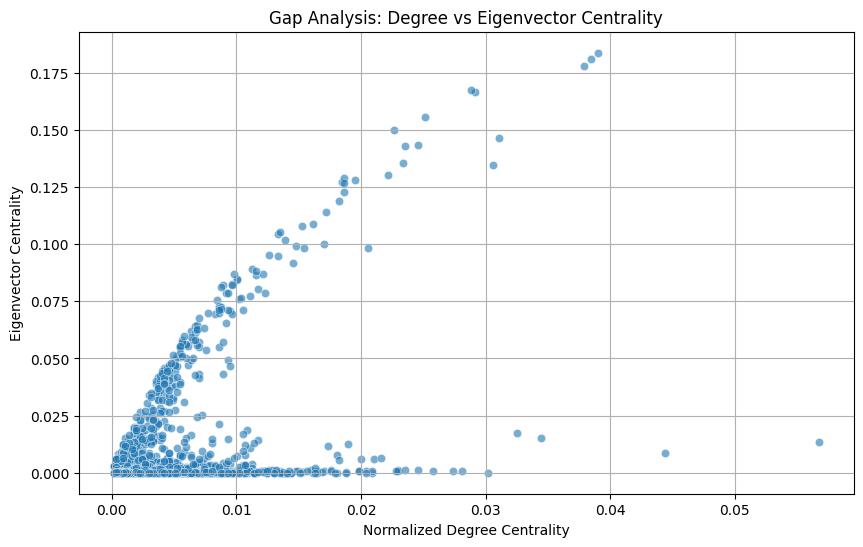

Found 19 candidates for the Three-Way Case Study.
Top candidates meeting the criteria:
               page_name  Degree_Rank  Eigenvector_Rank  Closeness_Rank  \
4460       Andrea Nahles        103.5              30.0           320.0   
2032   Barbara Hendricks        130.5              33.0           283.5   
3945       Bärbel Kofler        122.0              34.0           317.0   
2205       Ulrich Kelber        177.0              35.0           295.0   
2603         Olaf Scholz        114.0              36.0           318.0   
2464      Bernd Westphal        122.0              37.0           351.0   
701     Thomas Oppermann        170.0              38.0           388.0   
565       Svenja Stadler        170.0              39.0           329.0   
1416  Christoph Strässer        185.5              40.0           306.0   
2079         Joachim Poß        185.5              41.0           452.0   

      Closeness_Centrality  
4460              0.250947  
2032              0.252875  


In [4]:
results_df['Degree_Rank'] = results_df['Degree_Centrality'].rank(ascending=False)
results_df['Eigenvector_Rank'] = results_df['Eigenvector_Centrality'].rank(ascending=False)
results_df['Closeness_Rank'] = results_df['Closeness_Centrality'].rank(ascending=False)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Degree_Centrality', y='Eigenvector_Centrality', alpha=0.6)
plt.title('Gap Analysis: Degree vs Eigenvector Centrality')
plt.xlabel('Normalized Degree Centrality')
plt.ylabel('Eigenvector Centrality')
plt.grid(True)
plt.show()

candidates = results_df[
    (results_df['Degree_Rank'] > 100) &
    (results_df['Eigenvector_Rank'] <= 50)
].sort_values('Eigenvector_Rank')

print(f"Found {len(candidates)} candidates for the Three-Way Case Study.")
print("Top candidates meeting the criteria:")
print(candidates[['page_name', 'Degree_Rank', 'Eigenvector_Rank', 'Closeness_Rank', 'Closeness_Centrality']].head(10))

selected_politicians = candidates.head(3)
print("\nSelected Politicians for Case Study:")
print(selected_politicians[['page_name', 'page_type']])

In [5]:
print("Calculating Betweenness Centrality (this may take a moment)...")
betweenness_cent = nx.betweenness_centrality(G)

results_df['Betweenness_Centrality'] = results_df['id'].map(betweenness_cent)

results_df['Betweenness_Rank'] = results_df['Betweenness_Centrality'].rank(ascending=False)

top_betweenness = results_df.sort_values('Betweenness_Centrality', ascending=False).head(10)
print("\nTop 10 by Betweenness Centrality (Information Bottlenecks):")
print(top_betweenness[['page_name', 'Betweenness_Centrality', 'Degree_Rank', 'Degree_Centrality']])


Calculating Betweenness Centrality (this may take a moment)...

Top 10 by Betweenness Centrality (Information Bottlenecks):
             page_name  Betweenness_Centrality  Degree_Rank  Degree_Centrality
2825      Barack Obama                0.416556          6.0           0.034416
1399   Hillary Clinton                0.067820        145.5           0.010711
4613     Angela Merkel                0.060257          7.0           0.032485
2970    Justin Trudeau                0.060161         27.0           0.021598
3778  Malcolm Turnbull                0.056797         35.5           0.019842
3735     Manfred Weber                0.054810          1.0           0.056716
2857      Peter Tauber                0.047660         38.0           0.018964
90       Betinho Gomes                0.045638        122.0           0.011589
4774       Niels Annen                0.043659          8.0           0.031080
1105     Boris Johnson                0.037503        679.5           0.004917


Efficient Monitors (High Closeness, Low Degree):
                    page_name  Closeness_Centrality  Closeness_Rank  \
5022              Tanja Fajon              0.302042             4.0   
1656       Mariano Rajoy Brey              0.299280             6.0   
1399          Hillary Clinton              0.293829            10.0   
3500  Therese Comodini Cachia              0.292141            11.0   
3069          Guy Verhofstadt              0.291453            12.0   
5129           Aaron Farrugia              0.291379            13.0   
2159              Bernd Lange              0.288940            14.0   
5241                 Ian Borg              0.288764            15.0   
5685       Federica Mogherini              0.288034            17.0   
3888          Gianni Pittella              0.287554            18.0   
1279           Søren Espersen              0.284380            19.0   
185            Mechthild Heil              0.284139            20.0   

      Degree_Centrality  De

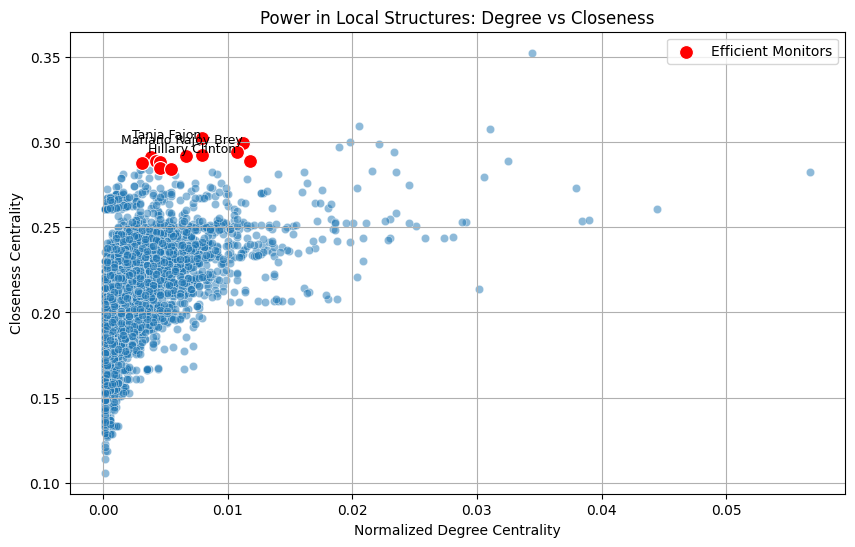


Visualizing Ego Network for: Tanja Fajon (ID: 19877)


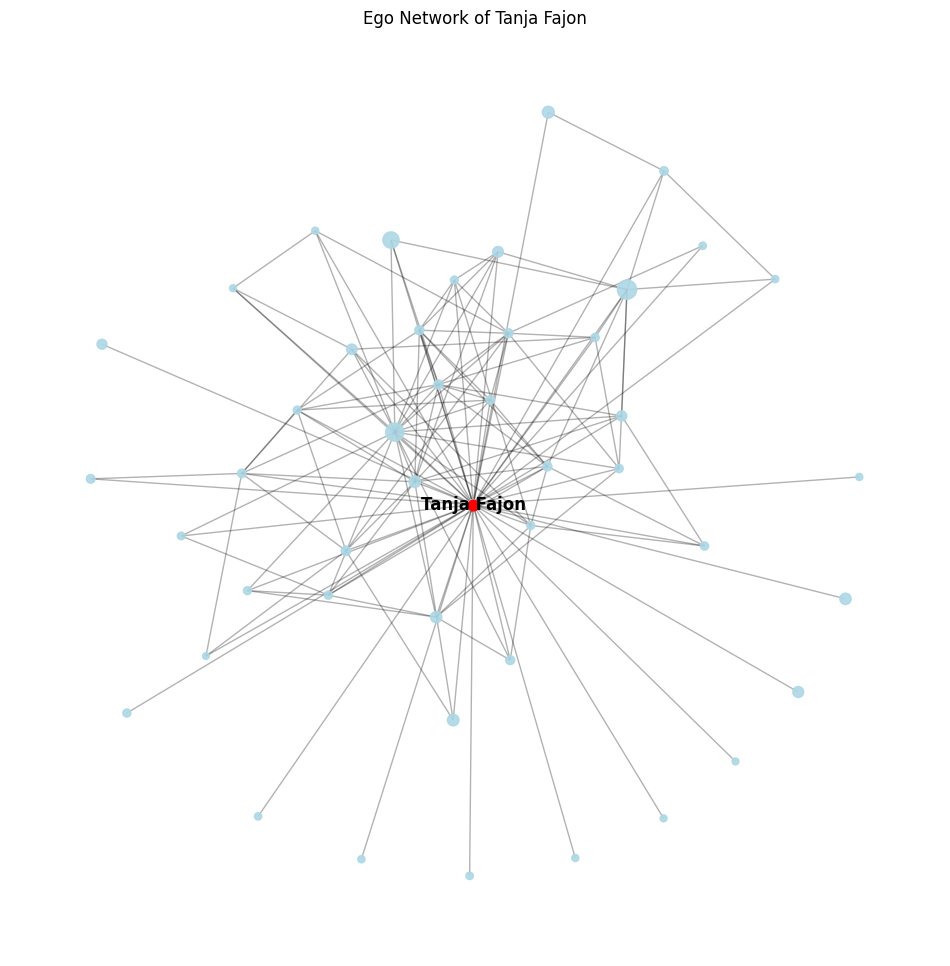

In [6]:
efficient_monitors = results_df[
    (results_df['Closeness_Rank'] <= 20) &
    (results_df['Degree_Rank'] > 100)
].sort_values('Closeness_Rank')

print("Efficient Monitors (High Closeness, Low Degree):")
print(efficient_monitors[['page_name', 'Closeness_Centrality', 'Closeness_Rank', 'Degree_Centrality', 'Degree_Rank']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Degree_Centrality', y='Closeness_Centrality', alpha=0.5)

sns.scatterplot(data=efficient_monitors, x='Degree_Centrality', y='Closeness_Centrality', color='red', s=100, label='Efficient Monitors')

for i, row in efficient_monitors.head(3).iterrows():
    plt.text(row['Degree_Centrality'], row['Closeness_Centrality'],
             row['page_name'], fontsize=9, ha='right', color='black')

plt.title('Power in Local Structures: Degree vs Closeness')
plt.xlabel('Normalized Degree Centrality')
plt.ylabel('Closeness Centrality')
plt.legend()
plt.grid(True)
plt.show()

if not efficient_monitors.empty:

    ego_id = efficient_monitors.iloc[0]['id']
    ego_name = efficient_monitors.iloc[0]['page_name']

    print(f"\nVisualizing Ego Network for: {ego_name} (ID: {ego_id})")


    ego_graph = nx.ego_graph(G, ego_id, radius=1)

    pos = nx.spring_layout(ego_graph, k=0.3, iterations=50, seed=42)

    node_sizes = [results_df.loc[results_df['id'] == n, 'Degree_Centrality'].values[0] * 5000 + 20 for n in ego_graph.nodes()]

    plt.figure(figsize=(12, 12))

    nx.draw_networkx_edges(ego_graph, pos, alpha=0.3)

    nx.draw_networkx_nodes(ego_graph, pos, node_size=node_sizes, node_color='lightblue', alpha=0.9)

    nx.draw_networkx_nodes(ego_graph, pos, nodelist=[ego_id], node_size=node_sizes[list(ego_graph.nodes()).index(ego_id)], node_color='red')

    labels = {ego_id: ego_name}
    nx.draw_networkx_labels(ego_graph, pos, labels=labels, font_size=12, font_weight='bold')

    plt.title(f'Ego Network of {ego_name}')
    plt.axis('off')
    plt.show()
else:
    print("No candidates found for Efficient Monitors based on the criteria.")

Calculating largest eigenvalue...
Largest Eigenvalue (lambda_max): 60.643138625908236
Betas used: Neutral=0.0, Supportive=0.014016424928851872, Suppressive=-0.014016424928851872
Calculating Bonacich Power scores...


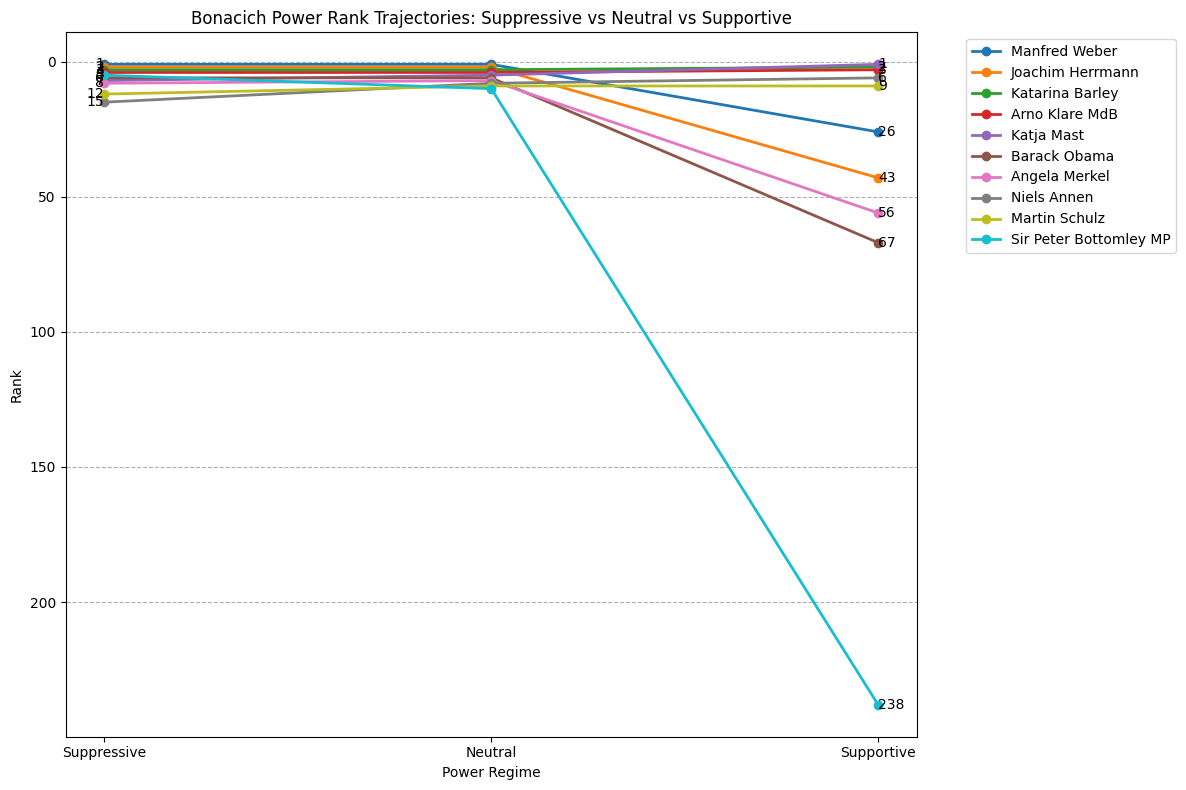


Top Power Amplifiers (Rank improves in Supportive):
                                           page_name  Rank_Neutral  \
2310                              Ingo Schäfer - SPD        4617.5   
4189                              Jeannine Pflugradt        4617.5   
4973                                 Enrico Corongiu        4617.5   
5395                                  Thorsten Karge        4617.5   
4617  Christoph Zimmermann- Unsere Zukunft ist Jetzt        4617.5   

      Rank_Supportive  Rank_Diff_Sup  
2310           1513.0         3104.5  
4189           1513.0         3104.5  
4973           1513.0         3104.5  
5395           1513.0         3104.5  
4617           1513.0         3104.5  

Top Power Inhibitors (Rank drops in Supportive):
           page_name  Rank_Neutral  Rank_Supportive  Rank_Diff_Sup
3984   Afzal Khan MP         749.5           1726.0         -976.5
5622      Jim Murphy         749.5           1681.0         -931.5
3166  Jerry Buttimer         749.5       

In [7]:
A = nx.adjacency_matrix(G, nodelist=results_df['id']).astype(float)

print("Calculating largest eigenvalue...")
eigenvalues, _ = spla.eigs(A, k=1, which='LM')
lambda_max = float(np.real(eigenvalues[0]))
print(f"Largest Eigenvalue (lambda_max): {lambda_max}")

beta_neutral = 0.0
beta_supportive = 0.85 * (1 / lambda_max)
beta_suppressive = -0.85 * (1 / lambda_max)

print(f"Betas used: Neutral={beta_neutral}, Supportive={beta_supportive}, Suppressive={beta_suppressive}")

from scipy.sparse import identity
from scipy.sparse.linalg import spsolve

n_nodes = A.shape[0]
I = identity(n_nodes)
degree_vector = A @ np.ones(n_nodes)

def calc_bonacich(beta):
    if beta == 0:
        return degree_vector
    else:
        M = I - beta * A
        try:
            c = spsolve(M, degree_vector)
            return c
        except Exception as e:
            print(f"Error solving for beta={beta}: {e}")
            return np.zeros(n_nodes)

print("Calculating Bonacich Power scores...")
scores_neutral = calc_bonacich(beta_neutral)
scores_supportive = calc_bonacich(beta_supportive)
scores_suppressive = calc_bonacich(beta_suppressive)

results_df['Bonacich_Neutral'] = scores_neutral
results_df['Bonacich_Supportive'] = scores_supportive
results_df['Bonacich_Suppressive'] = scores_suppressive

results_df['Rank_Neutral'] = results_df['Bonacich_Neutral'].rank(ascending=False)
results_df['Rank_Supportive'] = results_df['Bonacich_Supportive'].rank(ascending=False)
results_df['Rank_Suppressive'] = results_df['Bonacich_Suppressive'].rank(ascending=False)

top_neutral_indices = results_df.sort_values('Rank_Neutral').head(10).index

plot_data = results_df.loc[top_neutral_indices].copy()

plt.figure(figsize=(12, 8))

regimes = ['Suppressive', 'Neutral', 'Supportive']

for idx, row in plot_data.iterrows():
    y_values = [row['Rank_Suppressive'], row['Rank_Neutral'], row['Rank_Supportive']]
    plt.plot(regimes, y_values, marker='o', label=row['page_name'], linewidth=2)
    # Annotate start and end
    plt.text(0, row['Rank_Suppressive'], f"{int(row['Rank_Suppressive'])}", ha='right', va='center')
    plt.text(2, row['Rank_Supportive'], f"{int(row['Rank_Supportive'])}", ha='left', va='center')

plt.gca().invert_yaxis()
plt.title('Bonacich Power Rank Trajectories: Suppressive vs Neutral vs Supportive')
plt.ylabel('Rank')
plt.xlabel('Power Regime')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

results_df['Rank_Diff_Sup'] = results_df['Rank_Neutral'] - results_df['Rank_Supportive'] # Positive means improvement

print("\nTop Power Amplifiers (Rank improves in Supportive):")
print(results_df.sort_values('Rank_Diff_Sup', ascending=False)[['page_name', 'Rank_Neutral', 'Rank_Supportive', 'Rank_Diff_Sup']].head(5))

print("\nTop Power Inhibitors (Rank drops in Supportive):")
print(results_df.sort_values('Rank_Diff_Sup', ascending=True)[['page_name', 'Rank_Neutral', 'Rank_Supportive', 'Rank_Diff_Sup']].head(5))

print("\nStable Actors (Top 10 Neutral with least change):")
top_50_neutral = results_df.sort_values('Rank_Neutral').head(50)
top_50_neutral['Abs_Diff'] = top_50_neutral['Rank_Diff_Sup'].abs()
print(top_50_neutral.sort_values('Abs_Diff').head(5)[['page_name', 'Rank_Neutral', 'Rank_Supportive', 'Abs_Diff']])
